In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root='./data', train=True, transform=trans, download=True)
test_set = dset.MNIST(root='./data', train=False, transform=trans)
batch_size = 32


train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.25MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:03<00:00, 512kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.15MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [9]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
#         loss = F.nll_loss(output, target)
        loss = F.cross_entropy(output, target)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('\rEpoch: {} {:.0f}%\t     Loss: {:.6f}'.format(
                epoch,
                100. * batch_idx / len(train_loader), loss.item()), end='')

In [12]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        with torch.no_grad():
            data, target = Variable(data), Variable(target)
            output = model(data)
            # test_loss += F.cross_entropy(output, target, size_average=False).data[0]  # Replace this line
            test_loss += F.cross_entropy(output, target, reduction='sum').item() # with this line, reduction='sum' is equivalent to size_average=False
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc=100. * float(correct.to(torch.device('cpu')).numpy())
    print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(
        test_loss, acc / len(test_loader.dataset)))

    test_accuracy.append(acc / len(test_loader.dataset))

Epoch: 1 96%	     Loss: 2.297831
Test result: Average loss: 2.3072, Accuracy: 9.8600%

Epoch: 2 96%	     Loss: 2.302056
Test result: Average loss: 2.3052, Accuracy: 9.9000%

Epoch: 3 96%	     Loss: 2.299514
Test result: Average loss: 2.3033, Accuracy: 9.9600%

Epoch: 4 96%	     Loss: 2.285028
Test result: Average loss: 2.3014, Accuracy: 9.9600%

Epoch: 5 96%	     Loss: 2.296514
Test result: Average loss: 2.2996, Accuracy: 9.9700%

Epoch: 6 96%	     Loss: 2.293021
Test result: Average loss: 2.2978, Accuracy: 9.9800%

Epoch: 7 96%	     Loss: 2.284498
Test result: Average loss: 2.2960, Accuracy: 9.9700%

Epoch: 8 96%	     Loss: 2.297251
Test result: Average loss: 2.2943, Accuracy: 10.0400%

Epoch: 9 96%	     Loss: 2.285820
Test result: Average loss: 2.2925, Accuracy: 10.3500%

Epoch: 10 96%	     Loss: 2.277643
Test result: Average loss: 2.2907, Accuracy: 11.1400%

Epoch: 11 96%	     Loss: 2.292754
Test result: Average loss: 2.2889, Accuracy: 12.6700%

Epoch: 12 96%	     Loss: 2.296491
Tes

Text(0, 0.5, 'percent')

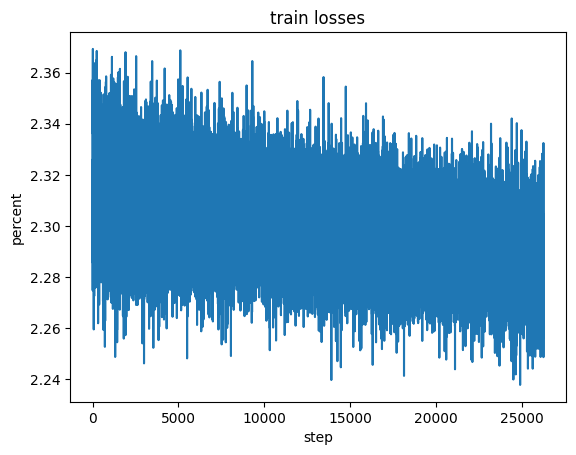

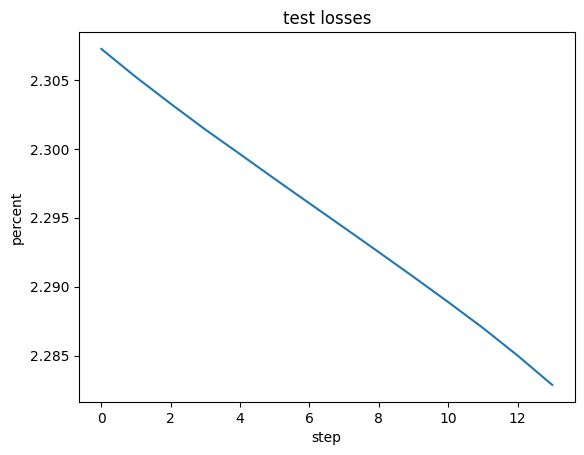

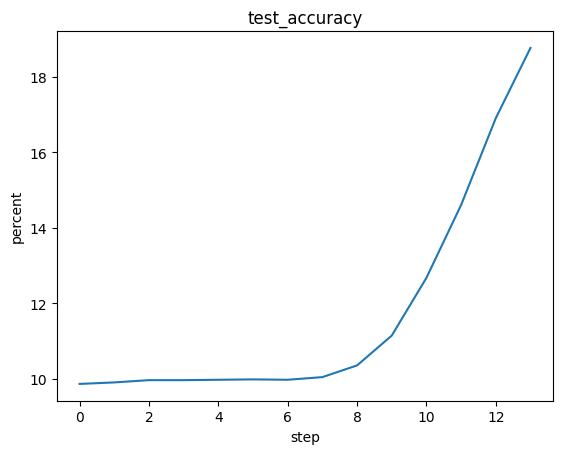

In [13]:
model = LeNet()
if torch.cuda.is_available():
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.0001)


train_losses = []
test_losses =[]
test_accuracy = []
for epoch in range(1, 15):
    train(epoch)
    test()
plt.figure()
plt.plot(train_losses)
plt.title('train losses')
plt.xlabel('step')
plt.ylabel('percent')

plt.figure()
plt.plot(test_losses)
plt.title('test losses')
plt.xlabel('step')
plt.ylabel('percent')

plt.figure()
plt.plot(test_accuracy)
plt.title('test_accuracy')
plt.xlabel('step')
plt.ylabel('percent')
